In [1]:
import numpy as np
import pandas as pd
from sklearn.externals import joblib
from TrainTestSplit import trainTestSplit
from sklearn.naive_bayes import GaussianNB

'------------------------------------------------- Initial Setup -------------------------------------------------'

%matplotlib inline
import seaborn as sns
from scipy import interp
from pprint import pprint
from itertools import cycle
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

np.set_printoptions(precision = 2)

In [2]:
## Loading in the data of Set B.
XTrain, XTest, YTrain, YTest = trainTestSplit("B")

In [3]:
## Setting the classifier to be Vanilla RBF SVM.
Classifier = SVC(kernel = 'rbf', probability = True)

## Defining a list to store the Cross-Validation Scores.
crossValidationScores = []

## Computing the 10-fold cross-validation score.
cvScore = cross_val_score(Classifier, XTrain, YTrain['FTR'], cv = 10)
crossValidationScores.append(np.mean(cvScore))
print "Cross Validation Score : ", np.mean(crossValidationScores)

## Computing the Training and Testing Accuracies.
Classifier.fit(XTrain,YTrain)
print "Training Accuracy : ", Classifier.score(XTrain, YTrain)
print "Testing Accuracy : ", Classifier.score(XTest, YTest)

Cross Validation Score :  0.514948419852
Training Accuracy :  0.695528339504
Testing Accuracy :  0.5390625


In [4]:
parameters = { 'C' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               'gamma' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50]
              }

Clf = joblib.load('./GridSearchObjects/SVMSetBCP1.pkl')

In [5]:
## Clf = GridSearchCV(Classifier, parameters, n_jobs = 5, verbose = 4, scoring = 'accuracy')

## Fitting the Model to the Training Data.
## Clf.fit(XTrain, YTrain.values.ravel())

In [6]:
## Printing the statistics after hyper-parameter tuning.
print Clf.best_score_
print Clf.best_estimator_

0.532326972373
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [7]:
## Setting the classifier to be the hyperparameter tuned RBF SVM.
Classifier1 = Clf.best_estimator_

## Defining a list to store the Cross-Validation Scores.
crossValidationScores = []

## Computing the 10-fold cross-validation score.
cvScore = cross_val_score(Classifier1, XTrain, YTrain['FTR'], cv = 10)
crossValidationScores.append(np.mean(cvScore))
print "Cross Validation Score : ", np.mean(crossValidationScores)

## Computing the Training and Testing Accuracies.
Classifier1.fit(XTrain,YTrain)
print "Training Accuracy : ", Classifier1.score(XTrain, YTrain)
print "Testing Accuracy : ", Classifier1.score(XTest, YTest)

Cross Validation Score :  0.53429110408
Training Accuracy :  0.544859014526
Testing Accuracy :  0.5578125


In [8]:
## Removing the highly correlated variables.
highCorr = ['Streak']

XTrain.drop(highCorr, axis = 1 , inplace = True)
XTest.drop(highCorr, axis = 1 , inplace = True)

parameters = { 'C' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               'gamma' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50]
              }

Clf = joblib.load('./GridSearchObjects/SVMSetBCP2.pkl')

In [9]:
## Clf = GridSearchCV(Classifier, parameters, n_jobs = 5, verbose = 4, scoring = 'accuracy')

## Fitting the Model to the Training Data.
## Clf.fit(XTrain, YTrain.values.ravel())

In [10]:
## Printing the statistics after hyper-parameter tuning.
print Clf.best_score_
print Clf.best_estimator_

0.532326972373
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [11]:
## Setting the classifier to be the hyperparameter tuned RBF SVM.
Classifier2 = Clf.best_estimator_

## Defining a list to store the Cross-Validation Scores.
crossValidationScores = []

## Computing the 10-fold cross-validation score.
cvScore = cross_val_score(Classifier2, XTrain, YTrain['FTR'], cv = 10)
crossValidationScores.append(np.mean(cvScore))
print "Cross Validation Score : ", np.mean(crossValidationScores)

## Computing the Training and Testing Accuracies.
Classifier2.fit(XTrain,YTrain)
print "Training Accuracy : ", Classifier2.score(XTrain, YTrain)
print "Testing Accuracy : ", Classifier2.score(XTest, YTest)

Cross Validation Score :  0.534007817961
Training Accuracy :  0.544859014526
Testing Accuracy :  0.5578125


In [12]:
## Loading in the data of Set B.
XTrain, XTest, YTrain, YTest = trainTestSplit("B")

## Removing the highly correlated variables.
highCorr = ['Streak']

XTrain.drop(highCorr, axis = 1 , inplace = True)
XTest.drop(highCorr, axis = 1 , inplace = True)

Classifier.fit(XTrain, YTrain)

## Obtaining our predictions made by the best Gaussian Naive Bayes Classifier .
YPred = Classifier.predict(XTest)

## Defining the target classes .
classLabels = ['H','A','D']

## Obtaining the confusion matrix for our predictions .
confusionMatrix = confusion_matrix(YTest['FTR'], YPred, classLabels)

In [13]:
## Obtaining a more readable format of our Confusion Matrix in terms of a Classification Report . 

classificationReport = classification_report(YTest, YPred, classLabels)
print classificationReport

             precision    recall  f1-score   support

          H       0.57      0.82      0.67       308
          A       0.54      0.48      0.51       174
          D       0.30      0.07      0.11       158

avg / total       0.49      0.55      0.49       640



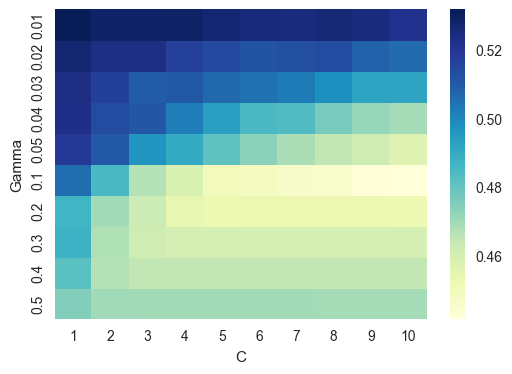

In [14]:
gridScores = Clf.grid_scores_

gridScoresList = []

for i in range(0, len(gridScores)):

    Score = (gridScores[i][1],)
    C = (gridScores[i][0]['C'],)
    Gamma = (gridScores[i][0]['gamma'],)

    Tuple = Score + C + Gamma
    gridScoresList.append(Tuple)
    
df = pd.DataFrame(gridScoresList, columns = ['Validation Score', 'C', 'Gamma'])

grid_map = df.pivot("Gamma", "C", "Validation Score")
sns.heatmap(grid_map, cmap = "YlGnBu")